In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
dataset_path = 'testdata.manual.2009.06.14.csv'
columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df = pd.read_csv(dataset_path, header=None, names=columns, encoding='latin-1')

In [3]:
sia = SentimentIntensityAnalyzer()

In [4]:
def analyze_sentiment_vader(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score > 0.05:
        return "Positive"
    elif sentiment_score < -0.05:
        return "Negative"
    else:
        return "Neutral"

In [5]:
df['predicted_sentiment'] = df['text'].apply(analyze_sentiment_vader)

In [6]:
sentiment_counts = df['predicted_sentiment'].value_counts()

In [7]:
labels = sentiment_counts.index
counts = sentiment_counts.values

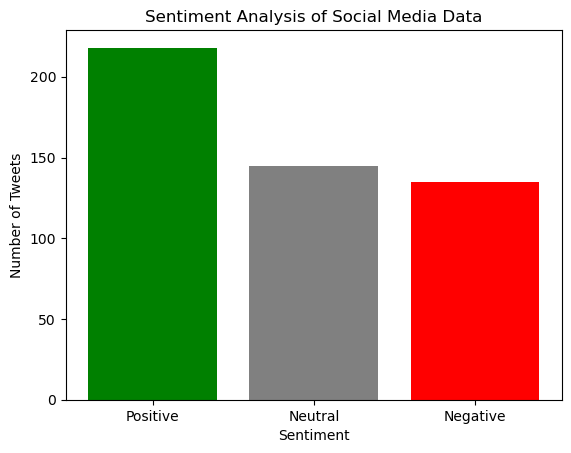

In [8]:
plt.bar(labels, counts, color=['green', 'gray', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis of Social Media Data')
plt.show()